# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market


Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

-- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**So interpretation is important!**

## Steps:
1. Reading,understanding and visualising the data.
2. Preparing the data for modelling(train-test split,rescalling etc..,)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

In [1]:
#Import necessary Libraries
import sys
#For Data Analysis and Computation
import numpy as np
import pandas as pd

#For Data Visualiuzation
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Statstic model Libraries
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy
import scipy.stats as stats

In [2]:
print('System Version:',sys.version)
print('System Version Info :',sys.version_info)
from platform import python_version
print('Python Version:',python_version())
print('Pandas Version:',pd.__version__)
print('NumPy Version:',np.__version__)
print('Matplotlib Version:',matplotlib.__version__)
print('Seaborn Version:',sns.__version__)
print('statsmodels Version:',sm.__version__)
print('sklearn Version:',sklearn.__version__)
print('scipy Version:',scipy.__version__)

System Version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
System Version Info : sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)
Python Version: 3.11.7
Pandas Version: 2.2.2
NumPy Version: 1.26.4
Matplotlib Version: 3.8.0
Seaborn Version: 0.13.2
statsmodels Version: 0.14.0
sklearn Version: 1.2.2
scipy Version: 1.11.4


#### Loading and exploring the Data

In [3]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#find the Null the Values
print(bike.isnull().sum())
print(bike.isnull().sum().mean())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0.0


In [7]:
#For Stastical View of the dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data Cleaning

In [10]:
#Dropping unnecessary columns
bike.drop(['instant'],axis=1,inplace=True)
bike.drop(['dteday'],axis=1,inplace=True)
bike.drop(['casual'],axis=1,inplace=True)
bike.drop(['registered'],axis=1,inplace=True)

In [11]:
#Encoding Season column
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bike['season'] = bike['season'].replace(season_mapping)

#Encoding Weather column
weather_mapping = {1: 'Clear', 2: 'Misty', 2: 'LightRain', 3: 'HeavyRain'}
bike['weathersit'] = bike['weathersit'].replace(weather_mapping)

#Encoding Month column
month_mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['mnth'] = bike['mnth'].replace(month_mapping)

#Encoding Weekday column
day_mapping = {0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'}
bike['weekday'] = bike['weekday'].replace(day_mapping)

#bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,LightRain,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,LightRain,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
cat_cols = ["season", "mnth", "weathersit", "weekday", "holiday", "workingday"]
num_cols = ["yr", "temp", "atemp", "hum", "windspeed", "cnt"]

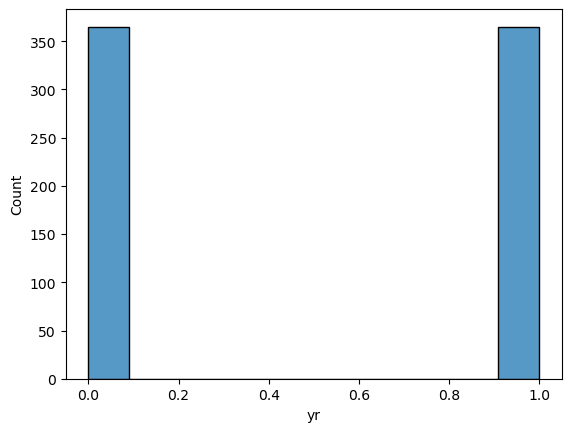

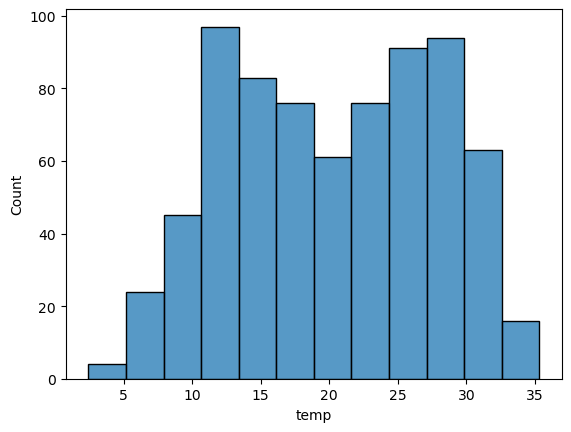

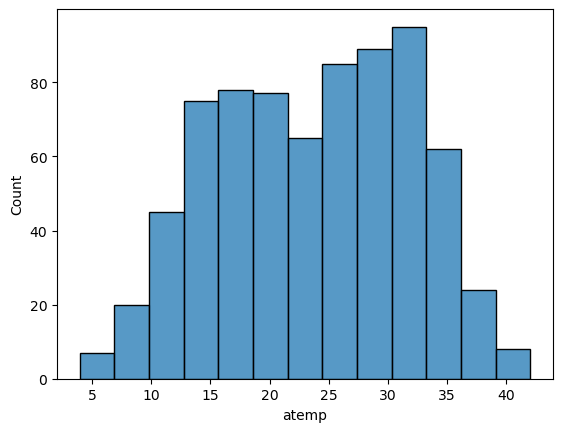

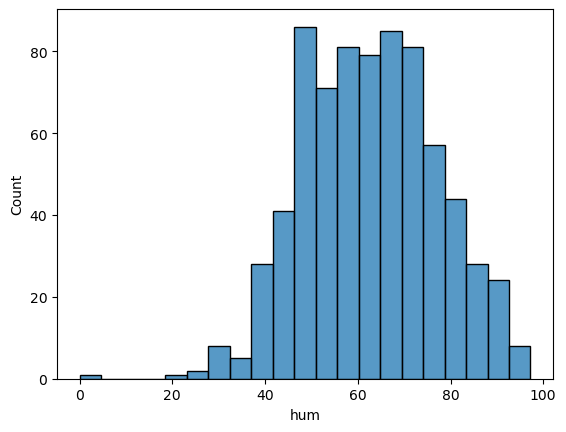

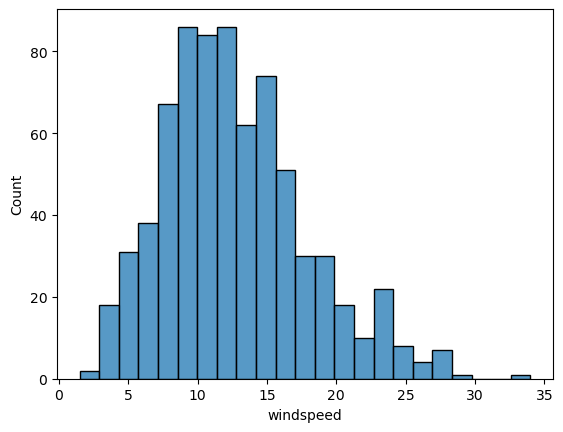

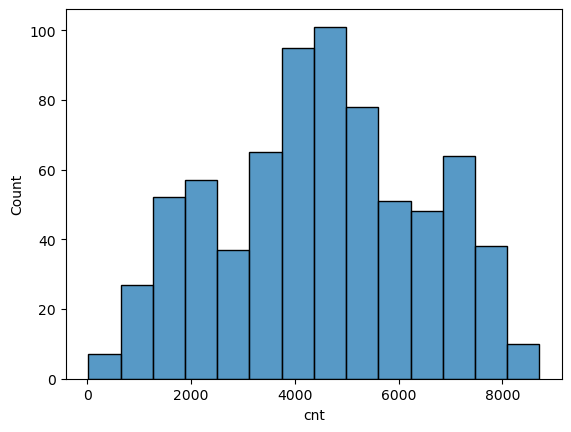

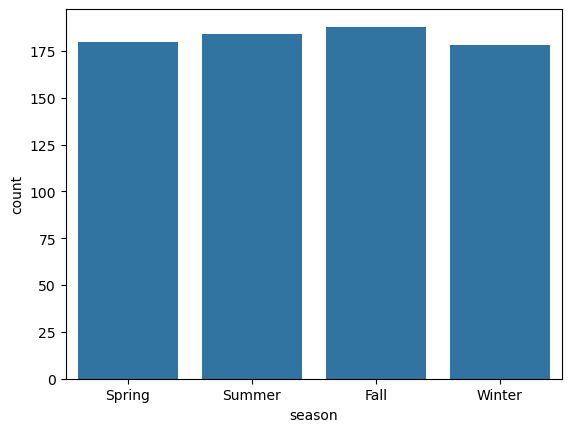

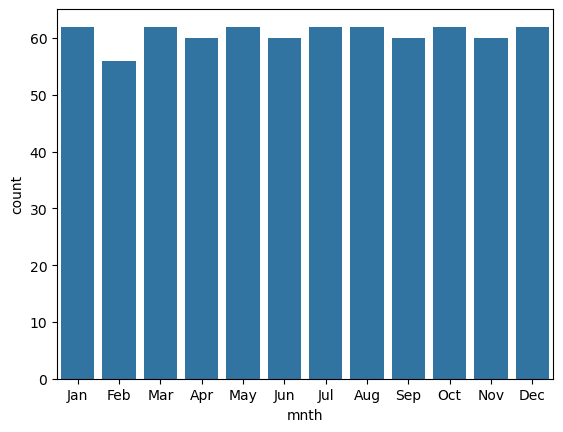

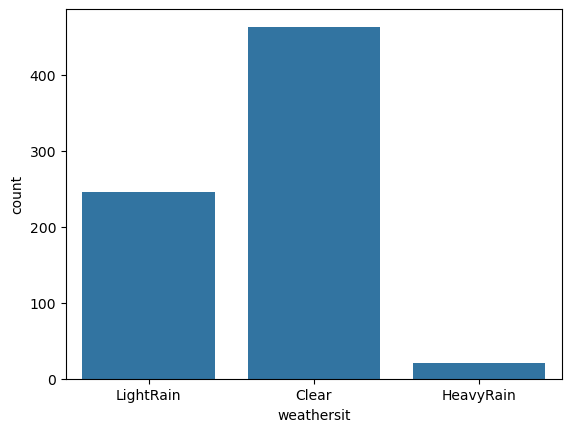

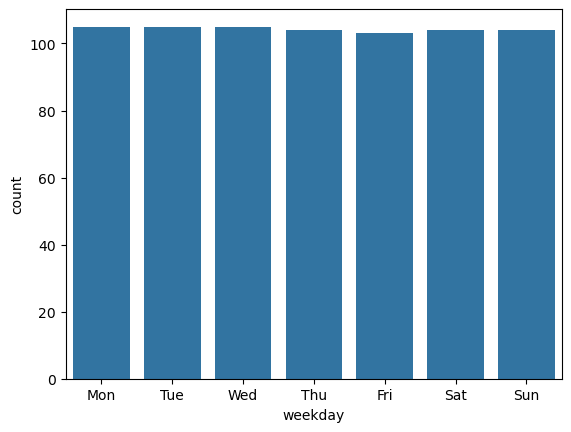

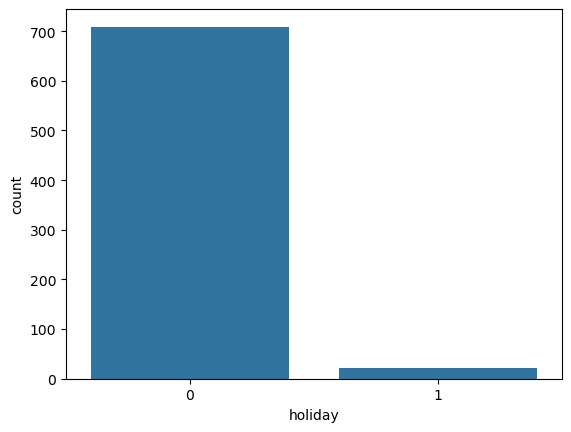

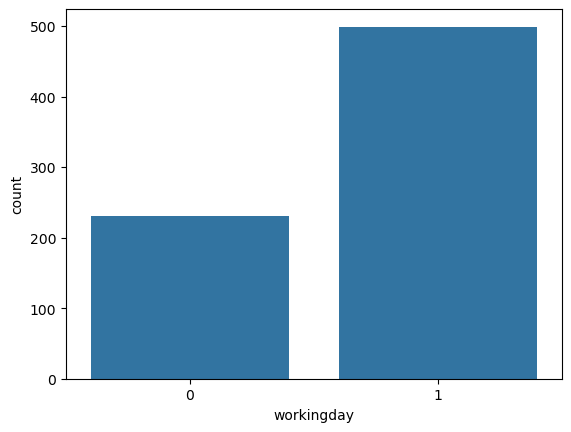

In [15]:
#Univariate Analysis
for i in num_cols:
    sns.histplot(x=bike[i])
    plt.show()
for i in cat_cols: 
    sns.countplot(x=bike[i]) 
    plt.show()

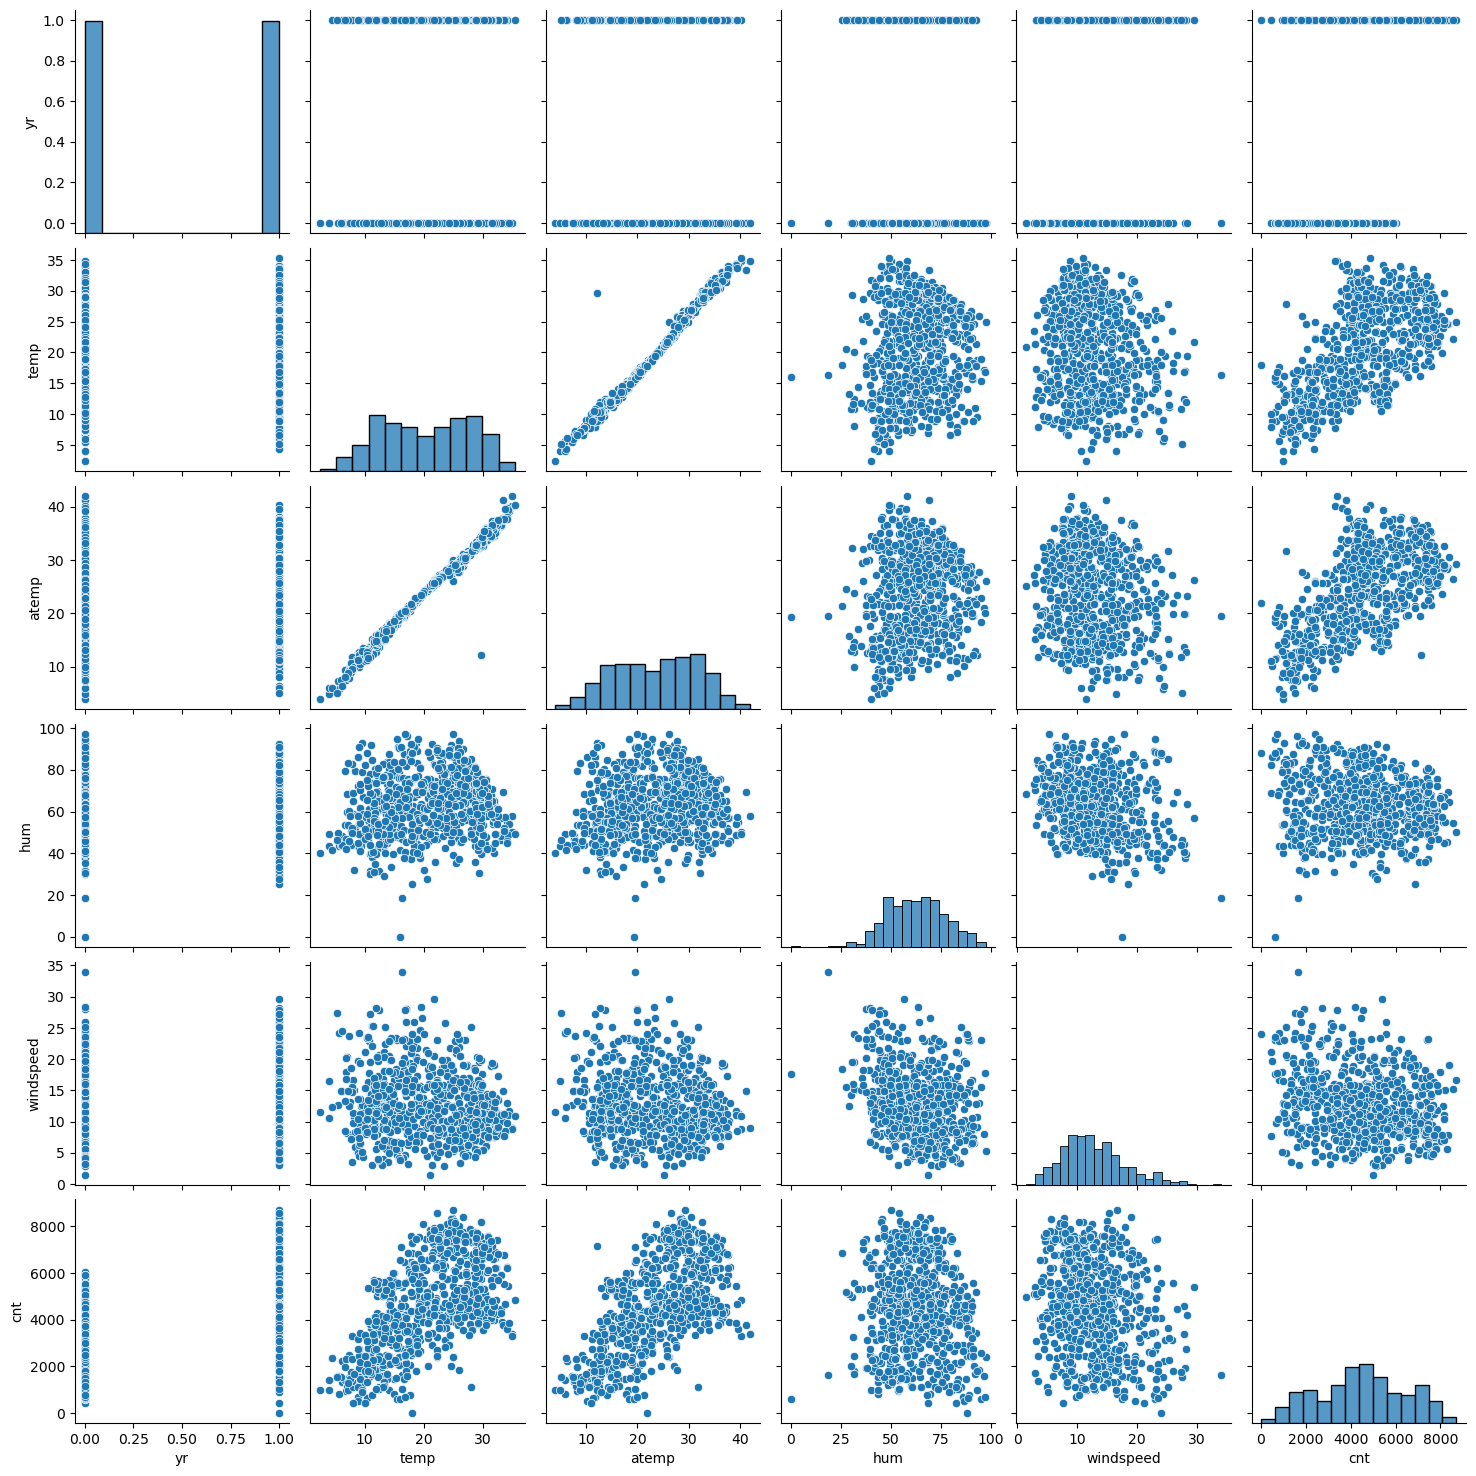

In [16]:
#Univariate Analysis
sns.pairplot(data=bike,vars=num_cols)
plt.show()

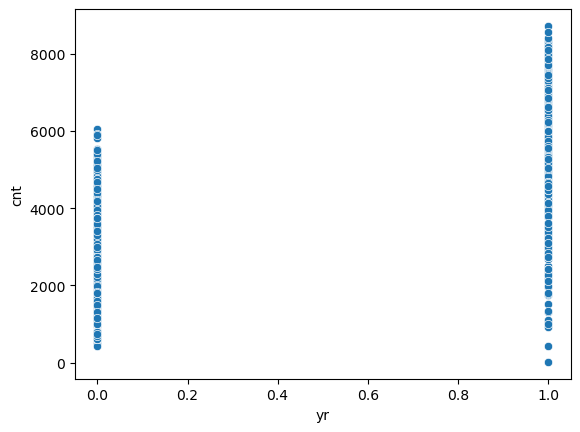

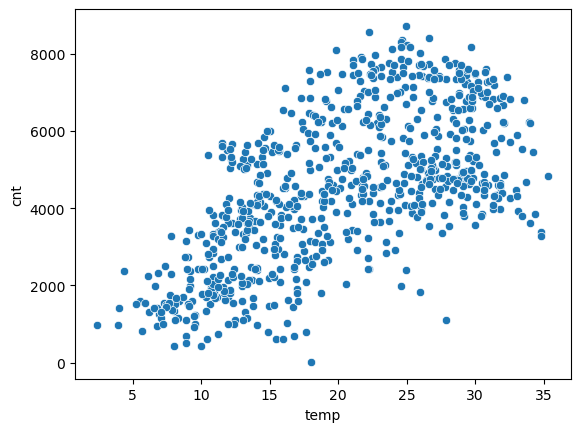

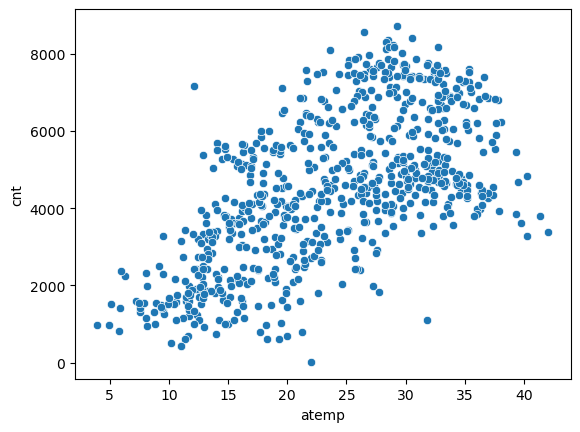

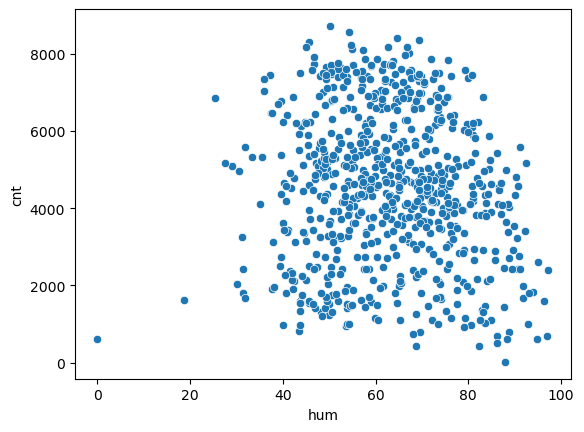

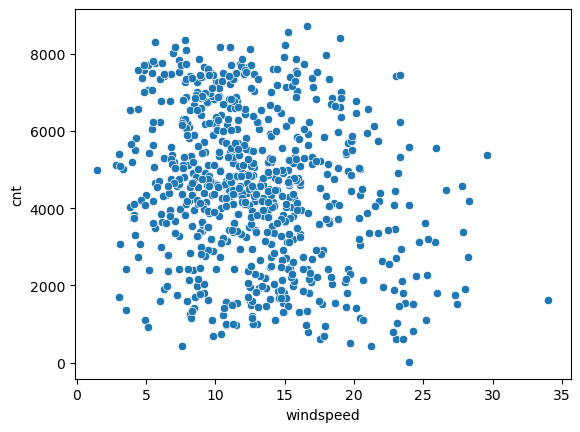

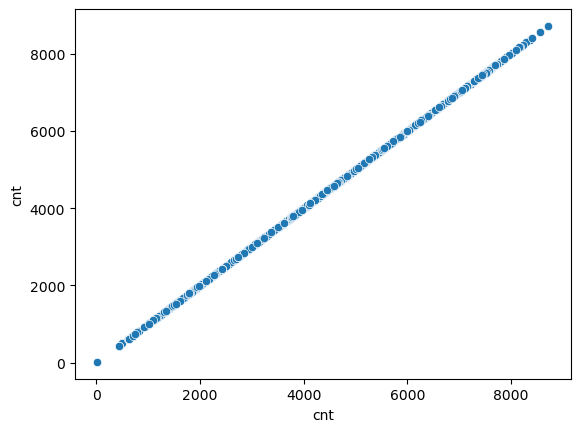

In [17]:
#Bivariate Analysis
for i in num_cols: 
    sns.scatterplot(x=bike[i],y=bike["cnt"]) 
    plt.show()

In [20]:
def plot_cat_columns(column):
    plt.style.use('dark_background')
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike, hue='yr',palette='Set1')
    # Create custom legend handles
    blue_patch = mpatches.Patch(color='blue', label='2019')
    green_patch = mpatches.Patch(color='red', label='2018')
   # Create legend with custom colors
    plt.legend(handles=[blue_patch, green_patch],loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

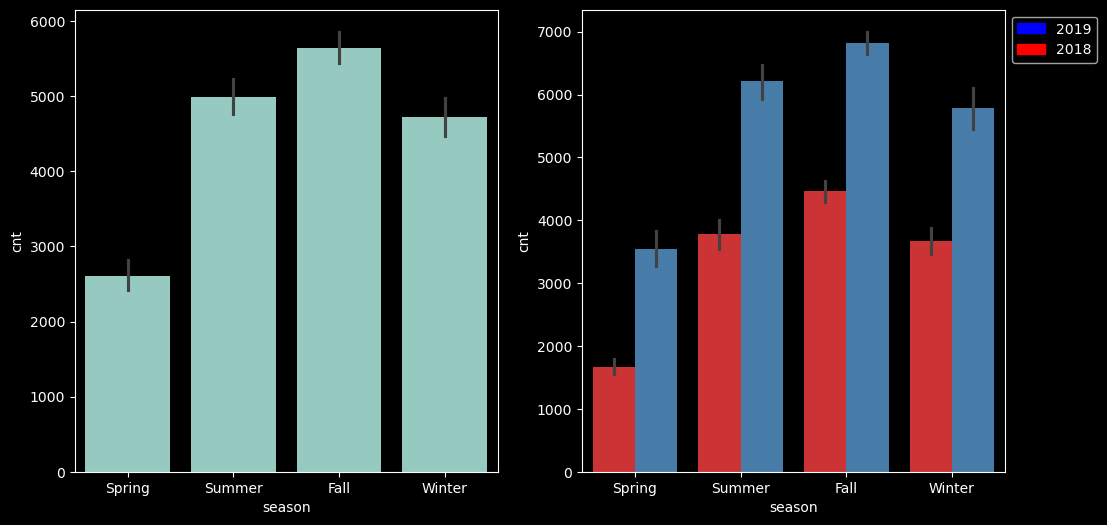

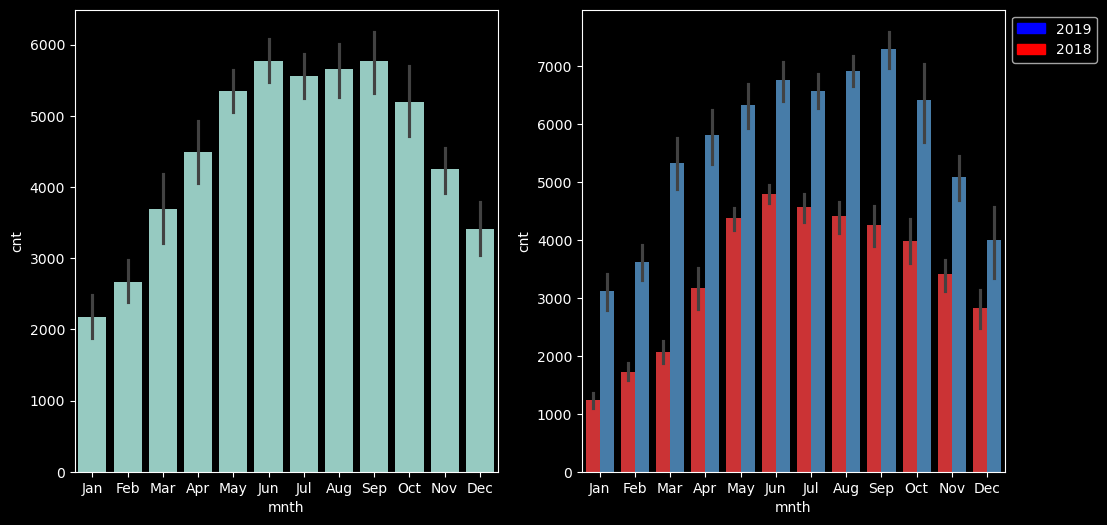

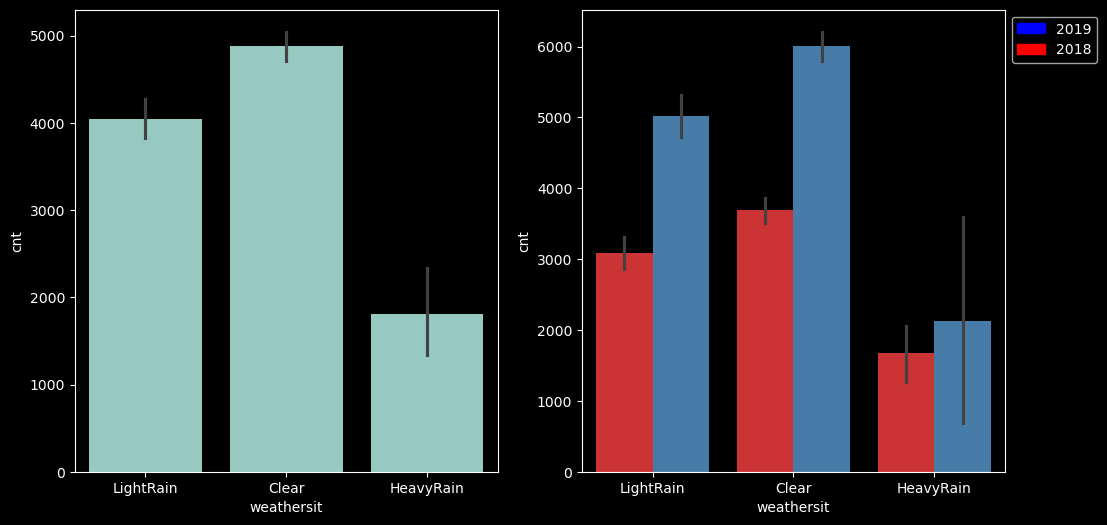

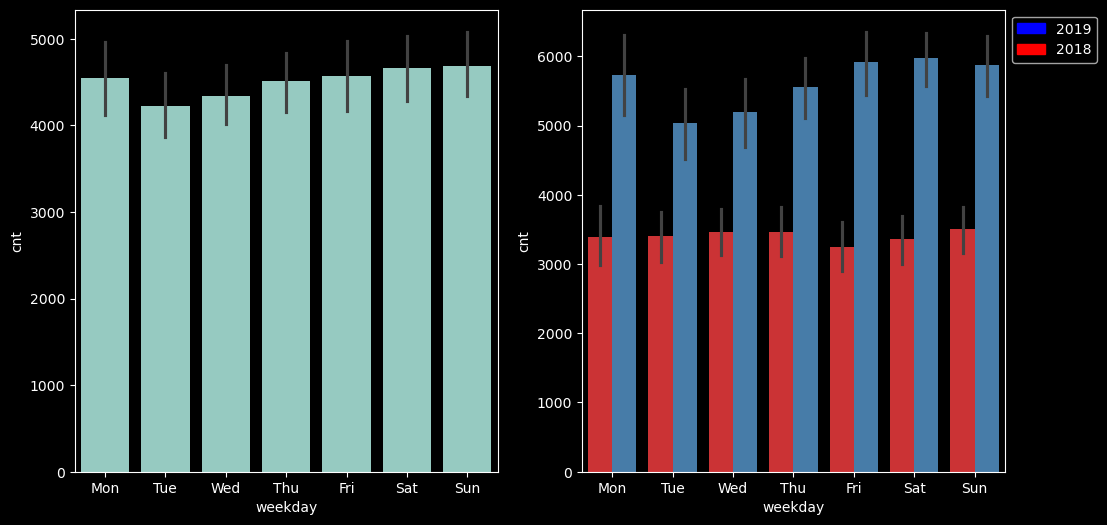

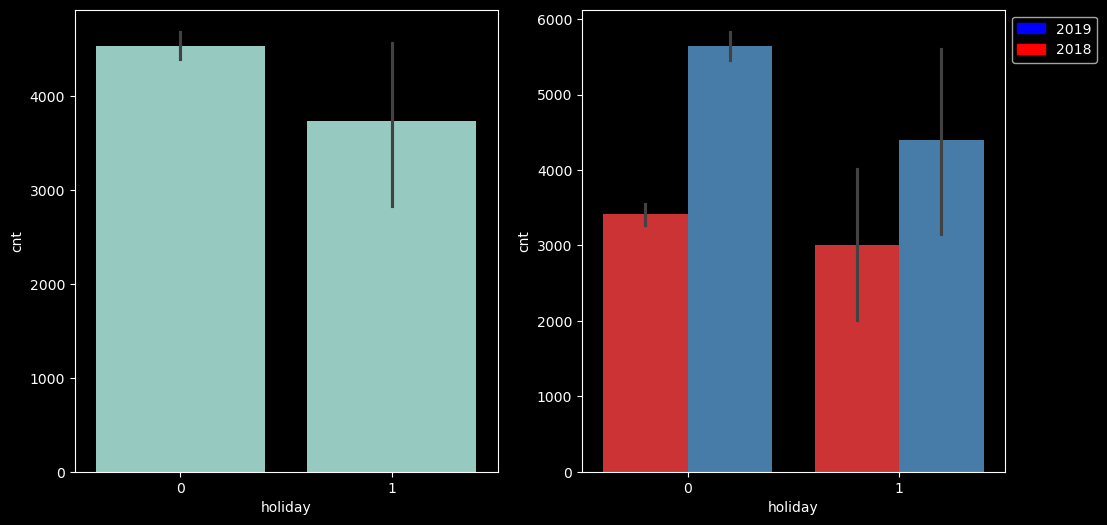

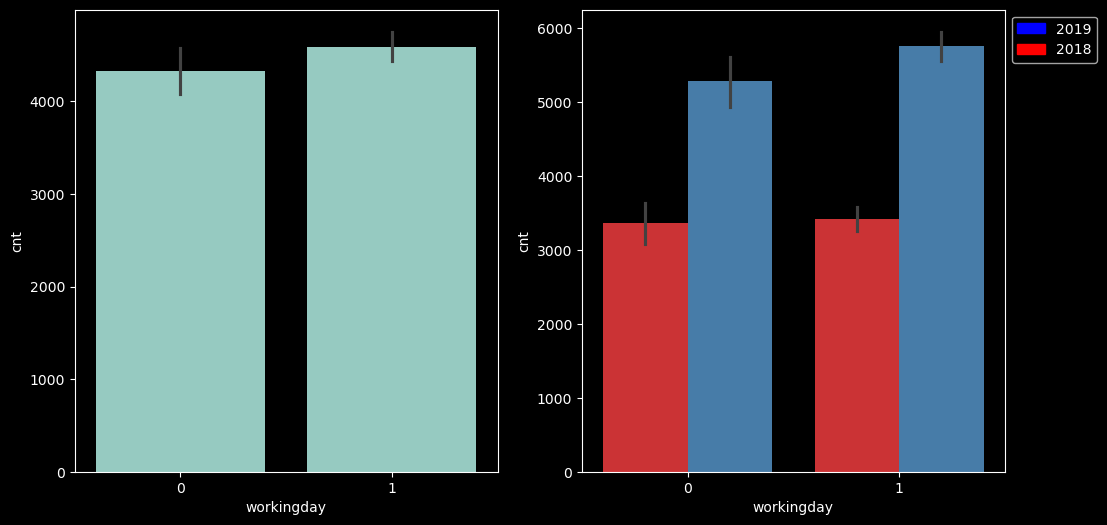

In [21]:
for col in cat_cols:
    plot_cat_columns(col)

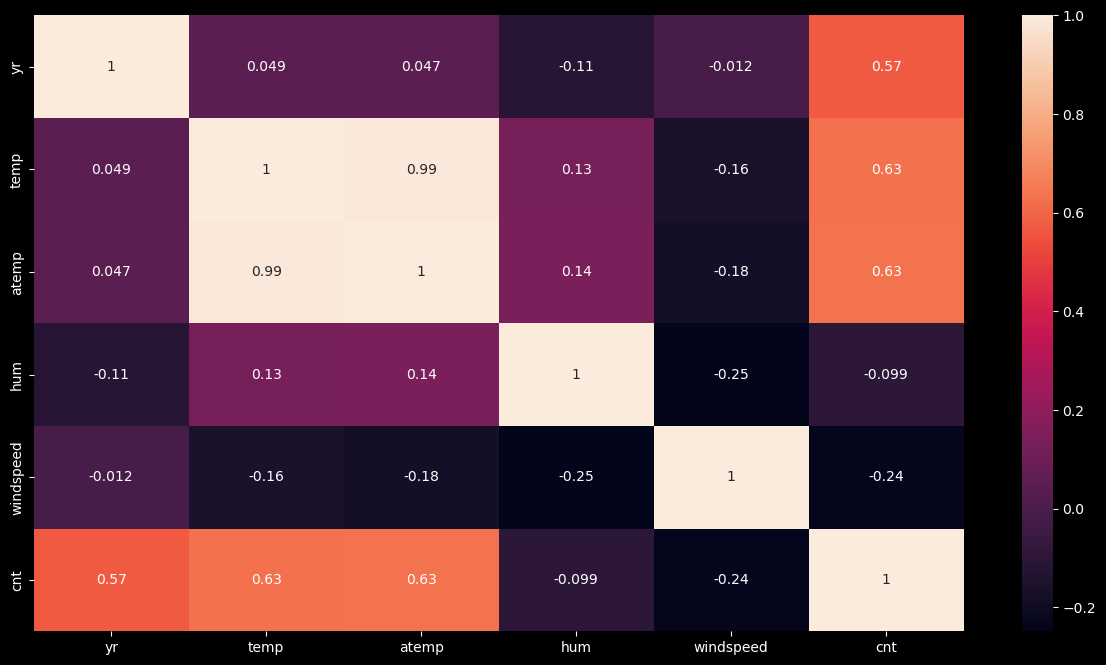

In [22]:
#Multivariate Analysis
plt.figure(figsize=(15,8)) 
sns.heatmap(bike[num_cols].corr(),annot=True) 
plt.show()

In [23]:
#check the values which are not in numbers and make a dummy variables
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,LightRain,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,LightRain,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# check the Unique Values
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [26]:
bike=bike.drop('weekday',axis=1)

In [27]:
bikedf.shape

(730, 11)

In [28]:
# Dummy variable creation for month, weekday, weathersit and season variables.

seasons_dm=pd.get_dummies(bike.season,drop_first=True, dtype=int)
months_dm=pd.get_dummies(bike.mnth,drop_first=True, dtype=int)
weathersit_dm=pd.get_dummies(bike.weathersit,drop_first=True, dtype=int)

In [29]:
# Merging  the dataframe and the dummy variable dataset. 
bike_new = pd.concat([bike,months_dm,weathersit_dm,seasons_dm],axis=1)
bike_new.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,...,Mar,May,Nov,Oct,Sep,HeavyRain,LightRain,Spring,Summer,Winter
0,Spring,0,Jan,0,0,LightRain,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,0,LightRain,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,1,0,0
2,Spring,0,Jan,0,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [30]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  Aug         730 non-null    int32  
 12  Dec         730 non-null    int32  
 13  Feb         730 non-null    int32  
 14  Jan         730 non-null    int32  
 15  Jul         730 non-null    int32  
 16  Jun         730 non-null    int32  
 17  Mar         730 non-null    int32  
 18  May         730 non-null    int32  
 19  Nov         730 non-null    i

In [31]:
# Dropping unnecessary columns since dummy variables now exist in the dataframe.

bike_new.drop(['season','mnth','weathersit'], axis = 1, inplace = True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Aug         730 non-null    int32  
 9   Dec         730 non-null    int32  
 10  Feb         730 non-null    int32  
 11  Jan         730 non-null    int32  
 12  Jul         730 non-null    int32  
 13  Jun         730 non-null    int32  
 14  Mar         730 non-null    int32  
 15  May         730 non-null    int32  
 16  Nov         730 non-null    int32  
 17  Oct         730 non-null    int32  
 18  Sep         730 non-null    int32  
 19  HeavyRain   730 non-null    i

In [32]:
bike_new.tail()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Mar,May,Nov,Oct,Sep,HeavyRain,LightRain,Spring,Summer,Winter
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,1,...,0,0,0,0,0,0,1,1,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,1,...,0,0,0,0,0,0,1,1,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,1,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
729,1,0,1,8.849153,11.17435,57.7500,10.374682,2729,0,1,...,0,0,0,0,0,0,1,1,0,0


### Splitting the data into Training and Test subsets

In [33]:
bike_train,bike_test = train_test_split(bike_new,train_size = 0.7,random_state = 100)

In [34]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [35]:
bike_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [36]:
bike_train.shape

(510, 24)

In [37]:
bike_test.shape

(220, 24)

In [38]:
scaler = MinMaxScaler()
bike_train = scaler.fit_transform(bike_train)
bike_test = scaler.transform(bike_test)

In [39]:
bike_train = pd.DataFrame(bike_train, columns=bike_new.columns)
bike_test = pd.DataFrame(bike_test, columns=bike_new.columns)

In [40]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Mar,May,Nov,Oct,Sep,HeavyRain,LightRain,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.098039,0.084314,0.086275,0.084314,0.080392,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.297660,0.278131,0.281045,0.278131,0.272166,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Mar,May,Nov,Oct,Sep,HeavyRain,LightRain,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.054545,0.086364,0.072727,0.086364,0.086364,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.227609,0.281541,0.260281,0.281541,0.281541,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
bike_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [43]:
y_train=bike_train.pop('cnt')
X_train=bike_train
y_test=bike_test.pop('cnt')
X_test=bike_test

In [44]:
print(X_train.shape)
print(y_train.shape)
y_train.head()

(510, 23)
(510,)


0    0.827658
1    0.465255
2    0.204096
3    0.482973
4    0.191095
Name: cnt, dtype: float64

In [45]:
print(X_test.shape)
print(y_test.shape)
y_test.head()

(220, 23)
(220,)


0    0.692706
1    0.712034
2    0.303382
3    0.547400
4    0.569029
Name: cnt, dtype: float64

In [46]:
lm=LinearRegression()
lm.fit(X_train,y_train)
selector = RFE(lm, n_features_to_select=15)

In [47]:
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True])

In [48]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('HeavyRain', True, 1),
 ('LightRain', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [49]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
col = X_train.columns[selector.support_]
print(col)
X_train_RFE=X_train[col]
X_test_RFE=X_test[col]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')


In [51]:
calculateVIF(X_train_RFE)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,Spring,4.37
14,Winter,4.06
13,Summer,2.82
11,LightRain,2.32
0,yr,2.09
8,Nov,1.85
6,Jan,1.75


In [52]:
X_train_LR_Model1 = sm.add_constant(X_train_RFE)
lr_1 = sm.OLS(np.array(y_train),X_train_LR_Model1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.15e-189
Time:                        19:49:02   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [53]:
#Manually Drop the columns by validating the VIF and p-values
calculateVIF(X_train_RFE)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,Spring,4.37
14,Winter,4.06
13,Summer,2.82
11,LightRain,2.32
0,yr,2.09
8,Nov,1.85
6,Jan,1.75


### VIF Logic to remove columns
- High p-value, high VIF
- high p, low VIF : Remove these columns first(holiday,Jan)
- low p, high VIF : Remove these columns after the above(workingday,Mon,Tue)
- low p, low VIF
#### Dropping the High VIF Value(hum) as we saw p values are less than 0.05

### Now remove the High VIF columns

In [54]:
X=X_train_RFE.drop('hum',axis=1)

In [55]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [56]:
X_train_LR_Model2 = sm.add_constant(X)
lr_2 = sm.OLS(np.array(y_train),X_train_LR_Model2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.75e-186
Time:                        19:49:22   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep            0.0687      0.017      4.015      0.000       0.035       0.102
HeavyRain     -0.2917      0.025    -11.840      0.000      -0.340      -0.243
LightRain     -0.0801      0.009     -9.198      0.000      -0.097      -0.063
Spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
Summer         0.0349      0.015      2.251      0.025       0.004       0.065
Winter         0.0869      0.018      4.831      0.000       0.052       0.122
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Again calculate VIF

In [57]:
calculateVIF(X)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,Winter,2.95
11,Spring,2.89
12,Summer,2.24
0,yr,2.07
7,Nov,1.81
5,Jan,1.66
6,Jul,1.59
10,LightRain,1.57


In [58]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [59]:
y_train_pred=lr_2.predict(X_train_LR_Model2)

<Axes: ylabel='Density'>

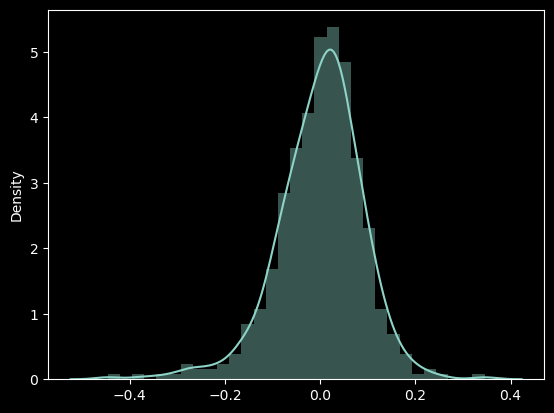

In [60]:
res=y_train-y_train_pred
sns.distplot(res)

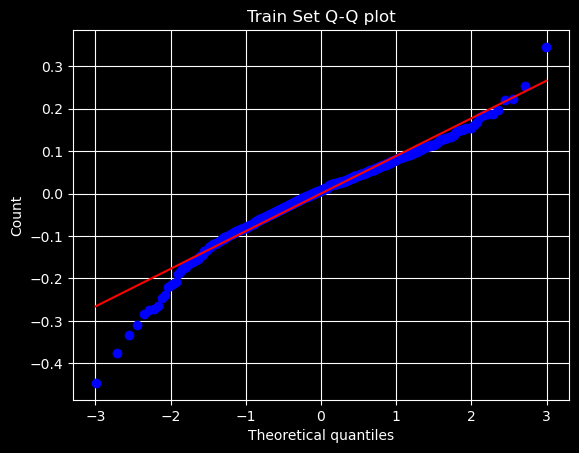

In [61]:
# Create Q-Q plot
stats.probplot(res, dist="norm", plot=plt)
plt.title('Train Set Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Predictions and Evaluation on the 'Test Set'

In [62]:
X_test_RFE.shape

(220, 15)

In [63]:
X_test_RFE.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [64]:
#Drop the Columns(holiday,hum,workingday)
X_test_sm=X_test_RFE.drop(['hum'],axis=1)

In [65]:
X_test_sm.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'HeavyRain', 'LightRain', 'Spring', 'Summer', 'Winter'],
      dtype='object')

### Predict the lr_2 Model with the test set

In [66]:
#Predict the Model
X_test_sm=sm.add_constant(X_test_sm)
y_test_pred=lr_2.predict(X_test_sm)

<Axes: ylabel='Density'>

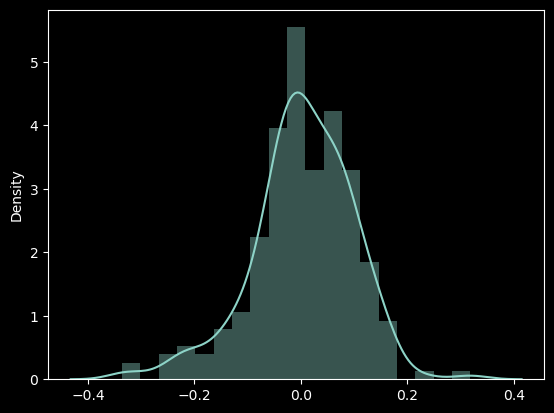

In [67]:
res1=y_test-y_test_pred
sns.distplot(res1)

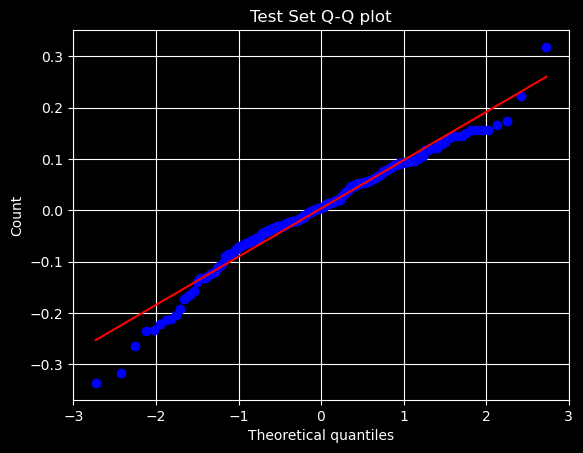

In [68]:
# Create Q-Q plot

stats.probplot(res1, dist="norm", plot=plt)
plt.title('Test Set Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Evalute the TestSet Model

In [69]:
r2_score(y_test,y_test_pred)

0.813676132581787

### Evalute the TrainSet Model

In [70]:
r2_score(y_train,y_train_pred)

0.8391472034949233

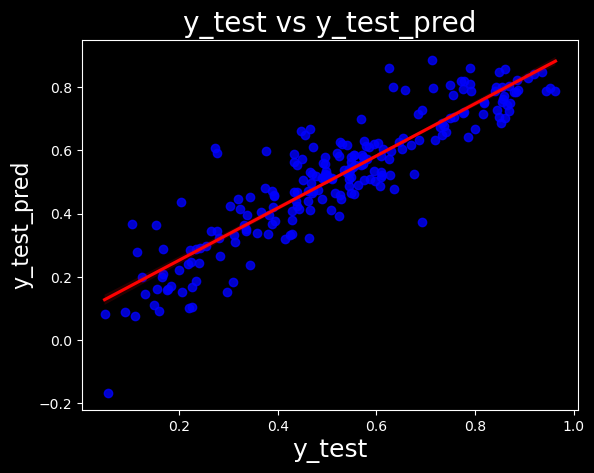

In [71]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

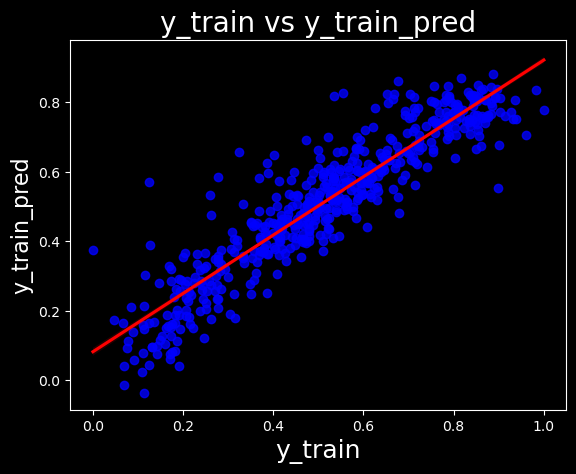

In [72]:
plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

In [73]:
 mean_squared_error(y_test, y_test_pred)

0.008908941475646217

# Conclusion:

- Based on the provided R-sqaure values (83.9% for the training set and 81.3% for the test set), it appears that you have a good model. The high and closely matched R-sqaure values indicate that the model performs well on both the training and test datasets, suggesting good generalization and minimal overfitting.


## Key Points for Evaluation:
### 1. High R-SQUARE Values:
- Both the training and test R-SQUARE values are relatively high, indicating that the model explains a large portion of the variance in both datasets.

### 2. Close R-SQUARE Values:
- The training and test R-SQUARE values are close to each other (83.9% vs. 81.3%), which suggests that the model generalizes well and is not overfitting. Overfitting would typically result in a much higher R-SQUARE on the training set and a significantly lower R-SQUARE on the test set.

### 3. Mean-Squared Error(MSE):
- If the target variable is normalized or within a small range, an MSE of 0.0089 is generally indicative of a good model.
